In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pickle
import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.svm import SVR
import itertools
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import numpy as nps
from itertools import combinations

In [ ]:
##### only for testing the new ponds ################


import numpy as np
########### define training features and reset index####################################


def train_inf(train,test,param,scale):
  ph=[]
  sal=[]
  amm=[]
  mag=[]
  cal=[]
  hard=[]
  alk=[]
  carb=[]
  bicarb=[]
  print("==================")
  print(param)
  print("==================")
  print()
  df_train = train
  df_test = test

  df_train = df_train[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12", "pH", "Salinity", "Carbonate", "BiCarbonate",\
                       "Alkalinity", "Hardness","Calcium", "Magnesium","Ammonia"]]


  df_train = df_train.reset_index()

  df_test = df_test[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12", "pH", "Salinity", "Carbonate", "BiCarbonate",\
                       "Alkalinity", "Hardness","Calcium", "Magnesium","Ammonia"]]

  df_test = df_test.reset_index()
  print('------------------------------------------------------------------')
  #print(df_test.loc[0].dtypes)
  ###################get the index val #########################
  minimum = df_train[param].min()
  baseline_index = np.where([df_train[param]==minimum])[1][0]
  print('baseline val : ', minimum)
  print('baseline_index : ', baseline_index)
  print("___________________________________")



  ##################drop the baseline row and subtract that from training data and val data##########################
  baseline = df_train.loc[baseline_index]
  df_train = df_train.drop(baseline_index)

  df_train = df_train-baseline

  df_test = df_test-baseline


  xTrain = df_train[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12",]]

  yTrain = df_train[[param]]/int(scale)
  if param=='Ammonia':
   # df_test = df_test[df_test['Ammonia'].notna()]
    yTrain = df_train[[param]]*int(scale)

  xTest = df_test[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12"]]
  yTest = df_test[[param]]

  #model = pickle.load(open('/content/{}.sav'.format(params[num]), 'rb'))
  model  = SVR(kernel='rbf', C=1.0, epsilon=0.2)
  model.fit(xTrain, yTrain)

  pred = model.predict(xTest)

  prediction = pred*int(scale)
  if param=='Ammonia':
    prediction = pred/int(scale)


  yTest = yTest + minimum
  prediction = prediction + minimum


  ##### to save the models
  filename = '/content/{}.sav'.format(param)
  pickle.dump(model, open(filename, 'wb'))

  print("Test results")
  print("___________________________")
  ### uncomment the below code if GT values are present

  print("MAE", mean_absolute_error(yTest, prediction))
  # # print("MSE", mean_squared_error(yTest, prediction))
  # # print("RMSE", mean_squared_error(yTest, prediction, squared=False))
  print("MAPE", mean_absolute_percentage_error(yTest, prediction))
  # print("R2 Score", r2_score(yTest, prediction))

  print()
  print(print(' Predicted' ))
  for i,j in zip(list(yTest[param]),prediction):
    print(i,j)

  print("===========================================================================")
  print()
  return prediction, baseline, minimum

In [ ]:
dataframe = pd.read_csv("./dataframe-tve.csv")
print("Total samples", len(dataframe))
#dataframe = dataframe[dataframe["Coincidence"]<3]
dataframe = dataframe[dataframe["Salinity"]>20]
print(len(dataframe))
trainingset = dataframe
# validationset = dataframe[dataframe["Date of Image"]=="2023-07-09"]
# trainingset = dataframe.drop(validationset.index)

Total samples 179
125


In [ ]:
max(trainingset['Alkalinity'])

250

In [ ]:
validationset = pd.read_csv('/content/testset.csv')

validationset['pH'] = [8.0,8.1,8.1,7.8,7.5]
validationset['Salinity'] = [30,30,25,20,22]
validationset['Ammonia'] = [0.07,0.03,0.04,0.04,0.08]
validationset['Carbonate'] = [0,10,10,0,0]
validationset['BiCarbonate'] = [150,200,250,100,110]
validationset['Alkalinity'] = [150,200,250,100,110]
validationset['Hardness'] = [6800,6960,6500,7100,7500]
validationset['Calcium'] = [684,688,644,1080,1102]
validationset['Magnesium'] = [1232,1262,1126,1069,1121]


In [ ]:
validationset

,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,...,PondID,pH,Salinity,Ammonia,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium
0,1209,96,691,437,954,1030,735,967,884,932,...,BR_P1,8.0,30,0.07,0,150,150,6800,684,1232
1,1212,81,1029,623,933,834,590,884,1423,1755,...,BR_P2,8.1,30,0.03,10,200,200,6960,688,1262
2,1198,102,921,532,1000,988,715,995,1026,1260,...,BR_P3,8.1,25,0.04,10,250,250,6500,644,1126
3,2110,360,1342,958,1730,1556,1417,1502,1862,2148,...,M_P1,7.8,20,0.04,0,100,100,7100,1080,1069
4,2123,358,1340,976,1746,1605,1416,1492,1850,2141,...,M_P2,7.5,22,0.08,0,110,110,7500,1102,1121


In [ ]:
ph,ph_baseline, ph_minimum =train_inf(trainingset,validationset,'pH',1)
print(ph_baseline, ph_minimum)
sal,sal_baseline, sal_minimum=train_inf(trainingset,validationset,'Salinity',10)
print(sal_baseline, sal_minimum)
amm,amm_baseline, amm_minimum =train_inf(trainingset,validationset,'Ammonia',100)
print(amm_baseline, amm_minimum)
mag,mag_baseline, mag_minimum = train_inf(trainingset,validationset,'Magnesium',1000)
print(mag_baseline, mag_minimum)
cal,cal_baseline, cal_minimum =train_inf(trainingset,validationset,'Calcium',1000)
print(cal_baseline, cal_minimum)
carb,carb_baseline, carb_minimum=train_inf(trainingset,validationset,'Carbonate',100)
print(carb_baseline,carb_minimum)
bicarb,bicarb_baseline, bicarb_minimum=train_inf(trainingset,validationset,'BiCarbonate',100)
print(bicarb_baseline, bicarb_minimum)
hard,hard_baseline, hard_minimum=train_inf(trainingset,validationset,'Hardness',1000)
print(hard_baseline, hard_minimum)
alk,alk_baseline, alk_minimum=train_inf(trainingset,validationset,'Alkalinity',100)
print(alk_baseline, alk_minimum)

# pH =  0.3238, 0.0404
# Salinity =  2.5328, 0.0643
# Ammonia = 0.03262, 0.4457
#mag = 323.5788, 0.2513
#cal = 91.0132, 0.1686
#carb = 15.3062, 4.0716
#bicarb = 34.7371, 0.2287
#hard = 960.6905, 0.1233
#alk = 23.9199, 0.1406
# sal = [1778.0,1683.0,1891.0,2268.0,2457.0,2654.0,2960.0,2793.0,3142.0,682.0,4002.0,3492.0]
# amm = [1461.0,1253.0,1154.0,919.0,1025.0,1059.0,1171.0,920.0,1188.0,165.0,980.0,612.0]
# mag =[1403.00,975.00,800.00,628.00,818.00,738.00,839.00,579.00,797.00,135.00,744.00,336.00]
# cal = [1551.00,1256.00,1189.00,912.00,1198.00,923.00,985.00,731.00,880.00,230.00,811.00,575.00]
# carb = [1672.00,1320.00,1195.00,945.00,1090.00,1003.00,1026.00,760.00,900.00,145.00,639.00,454.00]
# bicarb = [1497.0,1187.0,1055.0,809.0,926.0,862.0,923.0,711.0,942.0,160.0,789.0,481.0]
# hard = [1497.0,1187.0,1055.0,809.0,926.0,862.0,923.0,711.0,942.0,160.0,789.0,481.0]
# alk = [1403.00,975.00,800.00,628.00,818.00,738.00,839.00,579.00,797.00,135.00,744.00,336.00]


pH

------------------------------------------------------------------
baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.20468357822967131
MAPE 0.02540292597490046

 Predicted
None
8.0 8.20019748749382
8.5 8.299998316926688
8.1 8.353216199848523
8.2 8.103494097656137
7.9 8.123247461920595
7.7 8.214311477931178
8.5 8.298489858394275
8.2 8.181838371960152
8.4 8.199732934963464
8.0 8.166574747811518
8.1 8.163448886624286
8.3 8.179763114297858
8.3 8.237655879050354
8.6 8.346745975643213
7.7 8.19697596070729

index            73.00
B1             1584.00
B2             1376.00
B3             1321.00
B4             1296.00
B5             1437.00
B6             1501.00
B7             1639.00
B8             1483.00
B8A            1574.00
B9              241.00
B11            1097.00
B12             666.00
pH                7.50
Salinity         32.00
Carbonate         0.00
BiCarbonate     170.00
Alkalinity      170.00
Ha

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

3.5379019355947588e+16

 Predicted
None
0.0 18.325022503656665
40.0 20.01605023689341
10.0 25.539967496240934
20.0 21.059023698580255
0.0 20.021541367866003
0.0 19.690627703487138
30.0 19.266633789858314
20.0 20.215943491898887
30.0 22.413132057133918
0.0 19.966325531912645
0.0 19.78922842584939
30.0 20.210508494038983
30.0 20.051958928956477
40.0 19.996957185601627
0.0 20.04306010012442

index            27.00
B1             1672.00
B2             1320.00
B3             1195.00
B4              945.00
B5             1090.00
B6             1003.00
B7             1026.00
B8              760.00
B8A             900.00
B9              145.00
B11             639.00
B12             454.00
pH                8.00
Salinity         30.00
Carbonate         0.00
BiCarbonate     200.00
Alkalinity      200.00
Hardness       5600.00
Calcium         328.00
Magnesium      1232.00
Ammonia           0.02
Name: 27, dtype: float64 0
BiCarbonate

--------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
##### only for testing the new ponds ################


import numpy as np
########### define training features and reset index####################################


def test_inf(param,test_data):


  pH = [1584.00, 1376.00, 1321.0, 1296.00,1437.00,1501.00,1639.00,\
                  1483.00,1574.00,241.00,1097.00,666.00,7.5,1]

  Salinity = [1778.0,1683.0,1891.0,2268.0,2457.0,2654.0,2960.0,2793.0,\
         3142.0,682.0,4002.0,3492.0,21,10]
  Ammonia = [1461.0,1253.0,1154.0,919.0,1025.0,1059.0,1171.0,920.0,\
         1188.0,165.0,980.0,612.0,0.0,100]
  Magnesium =[1403.00,975.00,800.00,628.00,818.00,738.00,839.00,579.00,\
        797.00,135.00,744.00,336.00,603,1000]
  Calcium = [1551.00,1256.00,1189.00,912.00,1198.00,923.00,985.00,731.00,\
         880.00,230.00,811.00,575.00,300,1000]
  Carbonate = [1672.00,1320.00,1195.00,945.00,1090.00,1003.00,1026.00,\
          760.00,900.00,145.00,639.00,454.00,0,100]
  Bicarbonate = [1497.0,1187.0,1055.0,809.0,926.0,862.0,923.0,711.0,\
            942.0,160.0,789.0,481.0,90,100]
  Hardness = [1497.0,1187.0,1055.0,809.0,926.0,862.0,923.0,711.0,942.0,\
          160.0,789.0,481.0,4500,1000]
  Alkalinity = [1403.00,975.00,800.00,628.00,818.00,738.00,839.00,579.00,\
         797.00,135.00,744.00,336.00,120,100]

  baselines = {'pH':pH,'Salinity':Salinity,'Ammonia':Ammonia,\
               'Magnesium':Magnesium,'Calcium':Calcium,'Carbonate':Carbonate,\
                'Bicarbonate':Bicarbonate,'Hardness':Hardness,'Alkalinity':Alkalinity}

  baseline = pd.Series(baselines[param][:-2], index =["B1", "B2", "B3", "B4",\
                  'B5','B6','B7','B8','B8A','B9','B11','B12'])

  minimum = baselines[param][-2]
  scale = baselines[param][-1]
  test_data = test_data[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12"]]
  test_data = test_data.subtract(baseline, axis = 1)

  model = pickle.load(open('/content/{}.sav'.format(param), 'rb'))
  pred = model.predict(test_data)
  prediction = pred*int(scale)
  if param=='Ammonia':
    prediction = pred/int(scale)
  prediction = prediction + minimum

  return prediction

In [ ]:
pred= test_inf('Salinity',validationset)
print(pred)

[37.00383759 38.39751955 37.42918779 39.31470186 39.42460519 37.96775581
 37.6438694  36.2252425  40.00091266 39.81450858 38.69047237 39.60111826
 38.31656759 37.569638   38.21694617]


In [ ]:
##### only for testing the new ponds ################


import numpy as np
########### define training features and reset index####################################


def test_inf(model,param,test_data,baseline_bands,baseline_val,scale):

  df_test = test

  df_test = df_test[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12"]]

  df_test = df_test.reset_index()
  print('------------------------------------------------------------------')
  print(df_test.loc[0].dtypes)
  ##################get the index val #########################
  baseline_index = np.where([df_train[param]==minimum])[1][0]
  print('baseline val : ', minimum)
  print('baseline_index : ', baseline_index)
  print("___________________________________")



  ##################drop the baseline row and subtract that from training data and val data##########################
  # baseline = df_train.loc[baseline_index]
  # df_train = df_train.drop(baseline_index)

  # df_train = df_train-baseline

  df_test = df_test-baseline


  # xTrain = df_train[["B1", "B2", "B3","B4", "B5", \
  #                      "B6", "B7", "B8", "B8A", "B9", "B11", "B12",]]

  # yTrain = df_train[[param]]/int(scale)
  # if param=='Ammonia':
  #   df_test = df_test[df_test['Ammonia'].notna()]
  #   yTrain = df_train[[param]]*int(scale)

  # xTest = df_test[["B1", "B2", "B3","B4", "B5", \
  #                      "B6", "B7", "B8", "B8A", "B9", "B11", "B12",]]
  # yTest = df_test[[param]]

  model = pickle.load(open('/content/{}.sav'.format(params[num]), 'rb'))
  #model  = SVR(kernel='rbf', C=1.0, epsilon=0.2)
  # model.fit(xTrain, yTrain)

  pred = model.predict(df_test)

  prediction = pred*int(scale)
  if param=='Ammonia':
    prediction = pred/int(scale)


  #yTest = yTest + minimum
  prediction = prediction + baseline_val


  # ##### to save the models
  # filename = '/content/{}.sav'.format(param)
  # pickle.dump(model, open(filename, 'wb'))

  # print("Test results")
  # print("___________________________")


  # print("===========================================================================")
  # print()
  return prediction

In [ ]:
testingset_tup = pd.read_csv('/content/Tup_TS.csv')
testingset_vav = pd.read_csv('/content/Vav_TS.csv')


In [ ]:
ph_tup =test_inf(trainingset,testingset_tup,'pH',1)
sal_tup=test_inf(trainingset,testingset_tup,'Salinity',10)
amm_tup =test_inf(trainingset,testingset_tup,'Ammonia',100)

testingset_tup['predicted_pH'] = ph_tup
testingset_tup['predicted_salinity'] = sal_tup
testingset_tup['predicted_ammonia'] = amm_tup

ph_vav =test_inf(trainingset,testingset_vav,'pH',1)
sal_vav =test_inf(trainingset,testingset_vav,'Salinity',10)
amm_vav =test_inf(trainingset,testingset_vav,'Ammonia',100)

testingset_vav['predicted_pH'] = ph_vav
testingset_vav['predicted_salinity'] = sal_vav
testingset_vav['predicted_ammonia'] = amm_vav

In [ ]:
ponds = []
for i in range(len(testingset_tup)):
  ponds.append('T_'+testingset_tup['PondID'].loc[i].split('_')[1])

testingset_tup['pond'] = ponds

ponds = []
for i in range(len(testingset_vav)):
  ponds.append('T_'+testingset_vav['PondID'].loc[i].split('_')[1])

testingset_vav['pond'] = ponds

test_tup = testingset_tup[["PondID",	"predicted_pH",	"predicted_salinity",	"predicted_ammonia",	"pond"]].to_csv('/content/tupilipalem_ts.csv',index=False)
test_vav = testingset_vav[["PondID",	"predicted_pH",	"predicted_salinity",	"predicted_ammonia",	"pond"]].to_csv('/content/vavilipalem_ts.csv',index=False)



In [ ]:
testingset_eru = pd.read_csv('/content/Eru_TS.csv')


ph_eru =test_inf(trainingset,testingset_eru,'pH',1)
sal_eru=test_inf(trainingset,testingset_eru,'Salinity',10)
amm_eru =test_inf(trainingset,testingset_eru,'Ammonia',100)

testingset_eru['predicted_pH'] = ph_eru
testingset_eru['predicted_salinity'] = sal_eru
testingset_eru['predicted_ammonia'] = amm_eru

ponds = []
for i in range(len(testingset_eru)):
  ponds.append('E_'+testingset_eru['PondID'].loc[i].split('_')[0])

testingset_eru['pond'] = ponds


test_eru = testingset_eru[["PondID",	"predicted_pH",	"predicted_salinity",	"predicted_ammonia",	"pond"]].to_csv('/content/eruru_ts.csv',index=False)




pH

------------------------------------------------------------------
baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________

Salinity

------------------------------------------------------------------
baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________

Ammonia

------------------------------------------------------------------
baseline val :  0.0
baseline_index :  0
___________________________________
Test results
___________________________



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
testingset_eru

,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,...,B8A,B9,QA10,QA20,QA60,PondID,predicted_pH,predicted_salinity,predicted_ammonia,pond
0,1812,296,972,729,1529,1356,1193,1231,1307,1378,...,1353,548,0,0,0,C1_2023-05-10,7.917202,28.113666,0.034002,E_2023-05-10
1,1909,411,1271,926,1634,1489,1359,1438,1489,1644,...,1589,677,0,0,0,C1_2023-05-15,7.986690,25.852639,0.048621,E_2023-05-15
2,1802,9,503,246,1472,1334,1076,1094,1007,1108,...,980,175,0,0,0,C1_2023-05-20,8.122855,28.502452,0.020936,E_2023-05-20
3,1719,12,1876,1068,1621,1675,1693,1675,1879,2156,...,2288,249,0,0,0,C1_2023-05-25,8.130697,27.681224,0.038885,E_2023-05-25
4,1982,81,2642,1640,1782,1753,1775,1843,2068,2257,...,2512,336,0,0,0,C1_2023-05-30,8.185905,27.412724,0.033342,E_2023-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1954,452,1207,832,2051,2010,1837,1927,1875,2010,...,1788,518,0,0,0,A4_2023-06-09,8.046109,21.042200,0.042592,E_2023-06-09
194,2065,285,1280,905,1906,1990,1793,2007,1903,2095,...,1949,568,0,0,0,A4_2023-06-14,7.999531,21.698847,0.045224,E_2023-06-14
195,1543,264,819,537,1254,1261,964,1199,1047,1157,...,1047,384,0,0,0,A4_2023-06-29,8.321601,31.703558,0.023666,E_2023-06-29
196,1465,12,401,237,1174,1274,872,1398,1334,1477,...,992,133,0,0,0,A4_2023-07-09,8.295978,29.469137,0.034042,E_2023-07-09


In [ ]:
##### only for testing the new ponds ################


import numpy as np
########### define training features and reset index####################################


def train_inf_absolute(train,test,param,scale):
  ph=[]
  sal=[]
  amm=[]
  mag=[]
  cal=[]
  hard=[]
  alk=[]
  carb=[]
  bicarb=[]
  print("==================")
  print(param)
  print("==================")
  print()
  df_train = train
  df_test = test

  df_train = df_train[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12", "pH", "Salinity", "Carbonate", "BiCarbonate",\
                       "Alkalinity", "Hardness","Calcium", "Magnesium", "Ammonia"]]
  df_train = df_train.reset_index()

  df_test = df_test[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12", "pH", "Salinity", "Carbonate", "BiCarbonate",\
                       "Alkalinity", "Hardness","Calcium", "Magnesium", "Ammonia"]]

  ###################get the index val #########################
  minimum = df_train[param].min()
  baseline_index = np.where([df_train[param]==minimum])[1][0]
  print('baseline val : ', minimum)
  print('baseline_index : ', baseline_index)
  print("___________________________________")



  ##################drop the baseline row and subtract that from training data and val data##########################
  baseline = df_train.loc[baseline_index]
  df_train = df_train.drop(baseline_index)

  df_train = df_train
  df_test = df_test


  xTrain = df_train[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12"]]
  yTrain = df_train[[param]]/int(scale)
  if param=='Ammonia':
    df_test = df_test[df_test['Ammonia'].notna()]
    yTrain = df_train[[param]]*int(scale)

  xTest = df_test[["B1", "B2", "B3","B4", "B5", \
                       "B6", "B7", "B8", "B8A", "B9", "B11", "B12"]]
  yTest = df_test[[param]]

  #model = pickle.load(open('/content/{}.sav'.format(params[num]), 'rb'))
  model  = SVR(kernel='rbf', C=1.0, epsilon=0.2)
  model.fit(xTrain, yTrain)

  pred = model.predict(xTest)

  prediction = pred*int(scale)
  if param=='Ammonia':
    prediction = pred/int(scale)


  yTest = yTest
  prediction = prediction


  ##### to save the models
  # filename = '/content/{}.sav'.format(params[num])
  # pickle.dump(model, open(filename, 'wb'))

  print("Test results")
  print("___________________________")
  ### uncomment the below code if GT values are present

  print("MAE", mean_absolute_error(yTest, prediction))
  # # print("MSE", mean_squared_error(yTest, prediction))
  # # print("RMSE", mean_squared_error(yTest, prediction, squared=False))
  # print("MAPE", mean_absolute_percentage_error(yTest, prediction))
#   print("R2 Score", r2_score(yTest, prediction))

  print()
  print(print('Ground Truth - Predicted' ))
  for i,j in zip(list(yTest[param]),prediction):
    print(i, j)

  print("===========================================================================")
  print()
  return prediction

# toa

\## training baseline model coincidence = 0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pickle
import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.svm import SVR
import itertools
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import numpy as nps
from itertools import combinations

In [ ]:
kotatest = pd.read_csv('/content/kotatestnew.csv')
kotatest

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,K_RIG_P1,2023-05-25,8.4,27,30,140,170,6100,440,1215,...,1636,1598,2022,2188,2413,1733,2568,210,2778,2189


In [ ]:
newtestdata = pd.read_csv('/content/newtestdata.csv')
newtestdata

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,K_RIG_P1,2023-05-25,8.4,27,30,140,170,6100,440,1215,...,1636,1598,2022,2188,2413,1733,2568,210,2778,2189
1,P1_TEST,2022-11-22,8.7,40,50,110,160,7200,442,1571,...,1234,1141,1142,1111,1364,1128,1312,300,1137,825
2,P2_TEST,NaN,8.2,25,20,160,180,6760,918,1032,...,1609,1515,1612,1711,1882,1577,1774,367,1538,1007


In [ ]:
testtesttest = pd.read_csv('/content/testtesttest.csv')
testtesttest

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,K_RIG_P1,2023-05-25,8.4,27,30,140,170,6100,440,1215,...,1636,1598,2022,2188,2413,1733,2568,210,2778,2189
1,P1_TEST,2022-11-22,8.7,40,50,110,160,7200,442,1571,...,1234,1141,1142,1111,1364,1128,1312,300,1137,825
2,P2_TEST,NaN,8.2,25,20,160,180,6760,918,1032,...,1609,1515,1612,1711,1882,1577,1774,367,1538,1007
3,Ocean,NaN,8.0,34,1,1,1,1,1,1,...,1220,910,818,780,798,688,750,179,485,337


In [ ]:
dataframe = pd.read_csv("./dataframe-tve.csv")
print("Total samples", len(dataframe))
#dataframe = dataframe[dataframe["Coincidence"]<3]


Total samples 179


In [ ]:
#dataframe = dataframe[dataframe["Coincidence"]<3]
dataframe = dataframe[dataframe["Salinity"]>20]

In [ ]:
for l in dataframe["PondID"].unique():
    print("Samples for date ",l,": ",len(dataframe[dataframe["PondID"]==l]))

Samples for date  TUPILIPALEM_A2 :  5
Samples for date  TUPILIPALEM_A3 :  6
Samples for date  TUPILIPALEM_A4 :  6
Samples for date  TUPILIPALEM_A5 :  6
Samples for date  TUPILIPALEM_B2 :  6
Samples for date  TUPILIPALEM_B3 :  6
Samples for date  TUPILIPALEM_B4 :  6
Samples for date  TUPILIPALEM_B5 :  6
Samples for date  TUPILIPALEM_B1 :  5
Samples for date  TUPILIPALEM_B7 :  6
Samples for date  TUPILIPALEM_B8 :  6
Samples for date  TUPILIPALEM_A1 :  5
Samples for date  TUPILIPALEM_A6 :  5
Samples for date  TUPILIPALEM_A7 :  5
Samples for date  TUPILIPALEM_A8 :  5
Samples for date  TUPILIPALEM_B6 :  4
Samples for date  TUPILIPALEM_C8 :  1
Samples for date  VAVILLAPALEM_A1 :  3
Samples for date  VAVILLAPALEM_A2 :  3
Samples for date  VAVILLAPALEM_A3 :  2
Samples for date  VAVILLAPALEM_A4 :  2
Samples for date  VAVILLAPALEM_A5 :  2
Samples for date  VAVILLAPALEM_A6 :  2
Samples for date  VAVILLAPALEM_A7 :  2
Samples for date  VAVILLAPALEM_B2 :  2
Samples for date  VAVILLAPALEM_B3 :  2
Sam

In [ ]:
dataframe.columns

Index(['PondID', 'pH', 'Salinity', 'Carbonate', 'BiCarbonate', 'Alkalinity',
       'Hardness', 'Calcium', 'Magnesium', 'Ammonia', 'DateofReport',
       'Coincidence', 'Date of Image', 'B1', 'B10', 'B11', 'B12', 'B2', 'B3',
       'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9'],
      dtype='object')

In [ ]:
for l in dataframe["Date of Image"].unique():
    print("Samples for date ",l,": ",len(dataframe[dataframe["Date of Image"]==l]))

Samples for date  2022-07-14 :  8
Samples for date  2022-08-23 :  15
Samples for date  2022-08-28 :  16
Samples for date  2022-09-12 :  16
Samples for date  2023-02-14 :  2
Samples for date  2023-04-20 :  17
Samples for date  2023-04-25 :  4
Samples for date  2023-05-20 :  12
Samples for date  2023-05-30 :  13
Samples for date  2023-07-09 :  15
Samples for date  2023-04-15 :  7


In [ ]:
### selecting 09-07-2023 for testing

validationset = dataframe[dataframe["Date of Image"]=="2023-07-09"]
trainingset = dataframe.drop(validationset.index)

In [ ]:
testtesttest = testtesttest.drop(testtesttest.index)

In [ ]:
testtesttest

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12


In [ ]:
trainingset

In [ ]:
validationset

In [ ]:
ph_pred = [8.283518646989906,
           8.39827259582833,

           8.437517215870502,


           8.357304765423109,
           8.338181272065539,
          8.504697922084581,
           8.476198416646447,
           8.437434493930766,
           8.420368313222493,

          ]

ph_actual = [8.0 ,8.5 ,8.2  ,8.5 ,8.2 ,8.4 ,8.0  ,8.3 ,8.3 ]


sal_actual = [35.0,
40.0,
40.0,
40.0,
36.0,
35.0,
42.0,
40.0,
40.0,
40.0,
39.0]
sal_pred = [
 35.766733763215015,
 36.78327574116457,
 36.790536886494635,
 38.37429978113569,
 38.52655930503117,
 36.70495239515186,
 39.29663954283452,
 38.75871428895375,
 37.57778259804472,
 38.336066926496706,
 37.108181099216765]


amm_actual = [
    0.04,
0.05,
0.04,
0.05,
0.05,
0.04,
0.04
 ]

amm_pred =[
 0.03785122426086872,
 0.02922070951671172,
 0.03432068166529676,
 0.03229762133762642,
 0.03288830991278609,
 0.036672636438224104,
 0.029969836577737857]

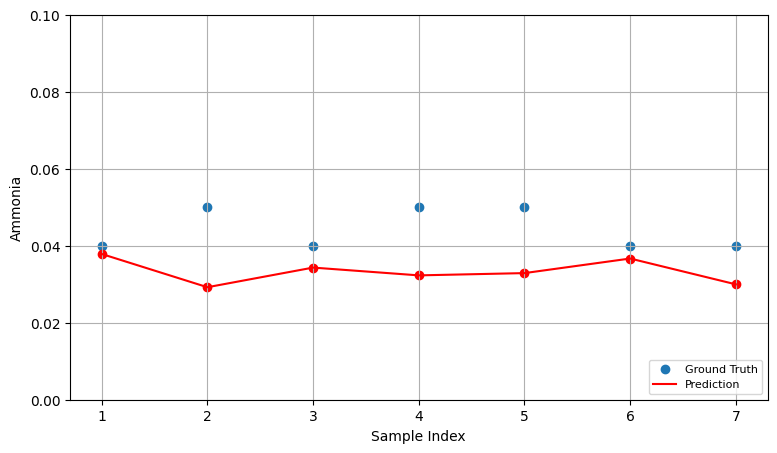

In [ ]:

plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(amm_pred)+1), amm_actual, label="Ground Truth")
plt.scatter(np.arange(1, len(amm_pred)+1), amm_pred,color = 'red')
plt.plot(np.arange(1, len(amm_pred)+1), amm_pred, color="red", label="Prediction")
plt.ylim(0.0,0.1)
plt.ylabel("Ammonia")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

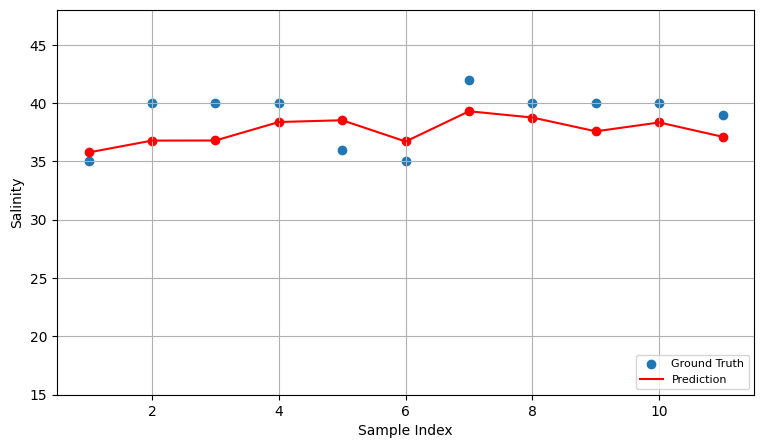

In [ ]:

plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(sal_pred)+1), sal_actual, label="Ground Truth")
plt.scatter(np.arange(1, len(sal_pred)+1), sal_pred,color = 'red')
plt.plot(np.arange(1, len(sal_pred)+1), sal_pred, color="red", label="Prediction")
plt.ylim(15,48)
plt.ylabel("Salinity")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

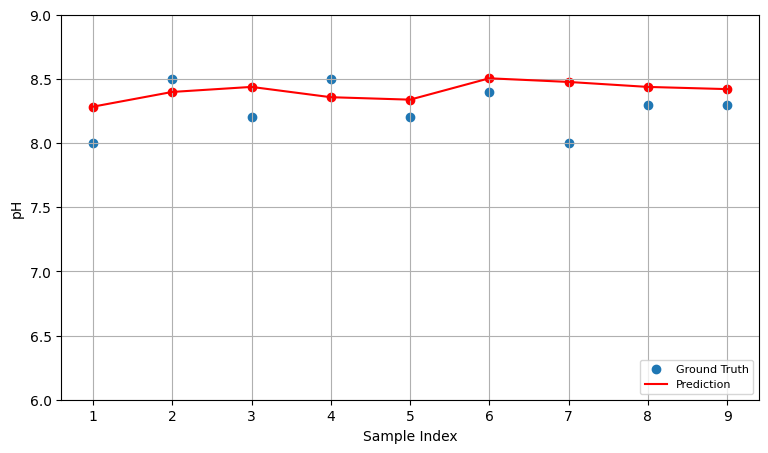

In [ ]:


plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(ph_pred)+1), ph_actual, label="Ground Truth")
plt.scatter(np.arange(1, len(ph_pred)+1), ph_pred,color = 'red')
plt.plot(np.arange(1, len(ph_pred)+1), ph_pred, color="red", label="Prediction")
plt.ylim(6, 9)
plt.ylabel("pH")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

In [ ]:
ph_actual = [8.4,8.7,8.2]
ph_pred = [8.222875312028107,8.460432532556236,7.910295014017632]

sal_actual = [27.0,
40.0,
25.0]
sal_pred = [
 29.581858147672648,
 33.787225134101774,
 25.020637273885164]

amm_actual = [0.0 ,
0.01,
0.06]
amm_pred = [
0.032489317509076535,
 0.016459947872140838,
 0.061422380041368144]


In [ ]:
ph_actual = [8.4,8.7,8.2,8.0]
ph_pred = [8.222875312028107,8.460432532556236,7.910295014017632,8.0883445397316]

sal_actual = [27.0,
40.0,
25.0,
34.0]
sal_pred = [
 29.581858147672648,
 33.787225134101774,
 25.020637273885164,
 30.672317744182976]

amm_actual = [0.0 ,
0.01,
0.06]
amm_pred = [
0.032489317509076535,
 0.016459947872140838,
 0.061422380041368144]


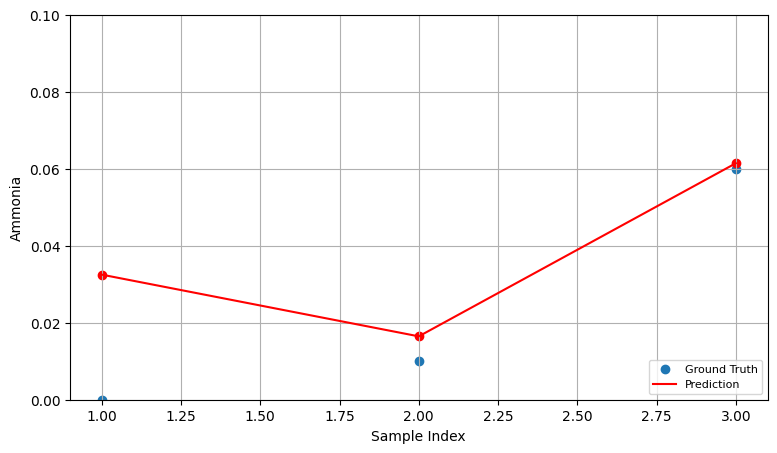

In [ ]:

plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(amm_pred)+1), amm_actual, label="Ground Truth")
plt.scatter(np.arange(1, len(amm_pred)+1), amm_pred,color = 'red')
plt.plot(np.arange(1, len(amm_pred)+1), amm_pred, color="red", label="Prediction")
plt.ylim(0.0,0.1)
plt.ylabel("Ammonia")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

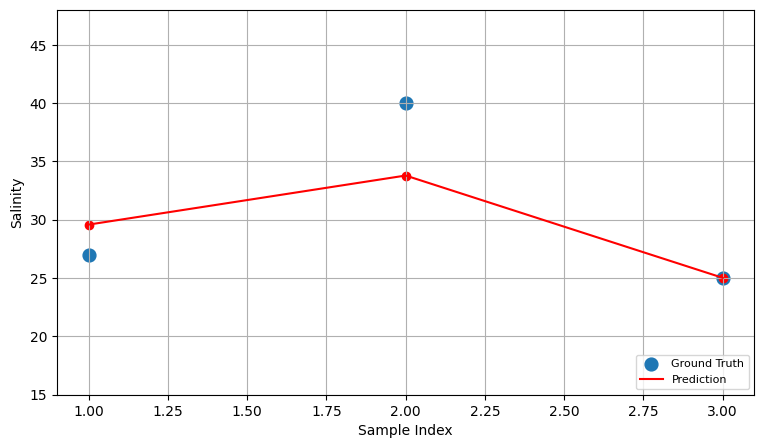

In [ ]:

plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(sal_pred)+1), sal_actual, label="Ground Truth",s=85)
plt.scatter(np.arange(1, len(sal_pred)+1), sal_pred,color = 'red')
plt.plot(np.arange(1, len(sal_pred)+1), sal_pred, color="red", label="Prediction")
plt.ylim(15,48)
plt.ylabel("Salinity")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

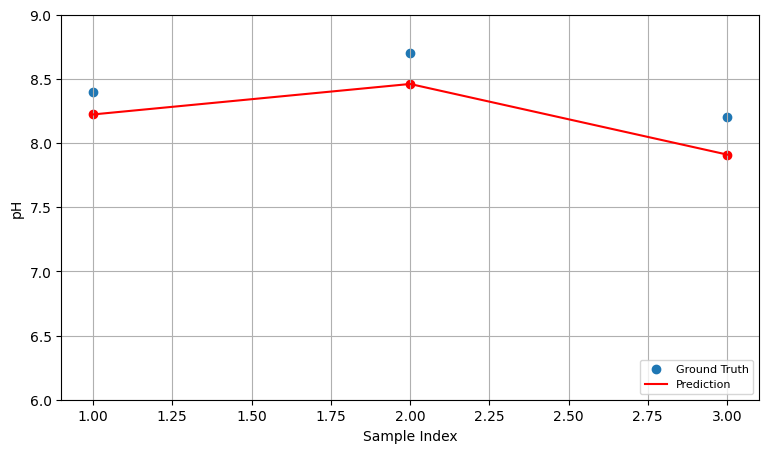

In [ ]:


plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(ph_pred)+1), ph_actual, label="Ground Truth")
plt.scatter(np.arange(1, len(ph_pred)+1), ph_pred,color = 'red')
plt.plot(np.arange(1, len(ph_pred)+1), ph_pred, color="red", label="Prediction")
plt.ylim(6, 9)
plt.ylabel("pH")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

In [ ]:
validationset.columns

Index(['PondID', 'pH', 'Salinity', 'Carbonate', 'BiCarbonate', 'Alkalinity',
       'Hardness', 'Calcium', 'Magnesium', 'Ammonia', 'DateofReport',
       'Coincidence', 'Date of Image', 'B1', 'B10', 'B11', 'B12', 'B2', 'B3',
       'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9'],
      dtype='object')

In [ ]:
testtesttest.columns

Index(['Pond', 'Date of Capture', 'pH', 'Salinity', 'Carbonate', 'BiCarbonate',
       'Alkalinity', 'Hardness', 'Calcium', 'Magnesium', 'Ammonia',
       'Coincidence', 'start_date', 'end_date', 'coordinates', 'type', 'lon1',
       'lat1', 'lon2', 'lat2', 'lon3', 'lat3', 'lon4', 'lat4', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'],
      dtype='object')

In [ ]:
dataframe = pd.read_csv("./dataframe-tve.csv")
print("Total samples", len(dataframe))
#dataframe = dataframe[dataframe["Coincidence"]<3]
dataframe = dataframe[dataframe["Salinity"]>20]
print(len(dataframe))
validationset = dataframe[dataframe["Date of Image"]=="2023-07-09"]
trainingset = dataframe.drop(validationset.index)

Total samples 179
125


In [ ]:
trainingset = trainingset[trainingset['Coincidence']==0]

In [ ]:
trainingset

,PondID,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,Ammonia,...,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9
0,TUPILIPALEM_A2,8.4,35,30,120,150,6300,388,1296,0.00,...,612,1253,1154,919,1025,1059,1171,920,1188,165
1,TUPILIPALEM_A3,8.7,38,40,120,160,6800,472,1471,0.00,...,484,1179,1065,794,854,918,1042,737,993,131
2,TUPILIPALEM_A4,8.7,39,40,110,150,6960,482,1488,0.00,...,432,1114,969,708,779,727,825,641,897,170
3,TUPILIPALEM_A5,8.7,40,40,120,160,7100,488,1491,0.00,...,524,1127,950,798,734,844,963,614,952,157
4,TUPILIPALEM_B2,8.6,36,50,110,160,6200,378,1302,0.00,...,710,1236,1162,1108,1114,1217,1268,828,1254,169
5,TUPILIPALEM_B3,8.6,38,40,110,150,6700,384,1441,0.00,...,555,1143,1140,811,1048,954,1077,771,1134,146
6,TUPILIPALEM_B4,8.6,37,30,90,140,4500,354,1402,0.00,...,481,1187,1055,809,926,862,923,711,942,160
7,TUPILIPALEM_B5,8.5,40,30,90,140,6980,476,1502,0.00,...,695,1205,1091,811,920,1004,1072,823,1084,175
39,TUPILIPALEM_A3,8.6,35,40,130,170,6200,336,1412,0.04,...,697,1179,1159,804,1233,1127,1189,856,1229,304
40,TUPILIPALEM_A4,8.5,35,40,120,160,6260,332,1428,0.03,...,531,1192,1223,859,1071,897,901,818,1023,331


In [ ]:
testtesttest

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,K_RIG_P1,2023-05-25,8.4,27,30,140,170,6100,440,1215,...,1636,1598,2022,2188,2413,1733,2568,210,2778,2189
1,P1_TEST,2022-11-22,8.7,40,50,110,160,7200,442,1571,...,1234,1141,1142,1111,1364,1128,1312,300,1137,825
2,P2_TEST,NaN,8.2,25,20,160,180,6760,918,1032,...,1609,1515,1612,1711,1882,1577,1774,367,1538,1007
3,Ocean,NaN,8.0,34,1,1,1,1,1,1,...,1220,910,818,780,798,688,750,179,485,337


In [ ]:

#= testtesttest.loc[:3]
ocean = testtesttest.loc[3]

In [ ]:
ocean

In [ ]:
validationset =testtesttest
# trainingset = dataframe

In [ ]:
#valid set removed
ph = 0.19
sal = 3.14/2.93
amm = 0.25

#valid set included
ph =0.22
sal = 3.
amm = 0.25

In [ ]:

ocean = {'PondID':'Ocean', 'pH':0, 'Salinity':34, 'Carbonate':0, 'BiCarbonate':0, 'Alkalinity':0,
       'Hardness':0, 'Calcium':0, 'Magnesium':0, 'Ammonia':0, 'DateofReport':0,
       'Coincidence':0, 'Date of Image':0, 'B1':1884, 'B10':1576, 'B11':485, 'B12':337, 'B2':1576, 'B3':1220,
       'B4':910, 'B5':818, 'B6':780, 'B7':798, 'B8':688, 'B8A':750, 'B9':179}

saltrain = trainingset.append(ocean, ignore_index = True)
saltrain


,PondID,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,Ammonia,...,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9
0,TUPILIPALEM_A2,8.4,35,30,120,150,6300,388,1296,0.00,...,612,1253,1154,919,1025,1059,1171,920,1188,165
1,TUPILIPALEM_A3,8.7,38,40,120,160,6800,472,1471,0.00,...,484,1179,1065,794,854,918,1042,737,993,131
2,TUPILIPALEM_A4,8.7,39,40,110,150,6960,482,1488,0.00,...,432,1114,969,708,779,727,825,641,897,170
3,TUPILIPALEM_A5,8.7,40,40,120,160,7100,488,1491,0.00,...,524,1127,950,798,734,844,963,614,952,157
4,TUPILIPALEM_B2,8.6,36,50,110,160,6200,378,1302,0.00,...,710,1236,1162,1108,1114,1217,1268,828,1254,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,ERURU_D1,8.3,27,30,190,220,5700,412,1186,0.01,...,537,1390,1328,1002,1163,1051,1093,908,930,333
122,ERURU_D2,8.2,25,20,180,200,5200,400,1166,0.04,...,457,1417,1406,1121,1321,1094,1151,934,1027,258
123,ERURU_D3,8.2,23,20,190,210,4700,340,1132,0.03,...,518,1440,1443,1207,1334,1161,1280,874,1173,294
124,ERURU_D4,8.2,22,20,170,190,4800,366,981,0.02,...,387,1437,1420,1160,1190,970,1052,871,892,294


In [ ]:
validationset

,PondID,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,Ammonia,...,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9
131,TUPILIPALEM_A1,8.0,35,0,140,140,7400,520,1458,0.04,...,314,1044,971,684,764,613,624,447,617,105
132,TUPILIPALEM_A6,8.5,40,40,160,200,7900,526,1616,0.08,...,342,910,744,525,707,675,648,533,617,99
133,TUPILIPALEM_A7,8.1,40,10,170,180,7900,520,1603,0.08,...,610,1044,948,807,1023,945,1194,961,1050,97
134,TUPILIPALEM_A8,8.2,40,20,150,170,7880,506,1586,0.05,...,616,946,748,573,991,816,1059,572,863,119
135,TUPILIPALEM_A3,7.9,36,0,170,170,7560,584,1482,0.08,...,461,925,761,560,932,897,1086,538,961,98
136,TUPILIPALEM_A4,7.7,35,0,160,160,7400,566,1471,0.10,...,306,954,858,599,784,736,744,531,699,125
137,TUPILIPALEM_A5,8.5,40,30,150,180,7800,538,1621,0.12,...,235,936,749,541,741,573,720,520,604,119
138,TUPILIPALEM_B1,8.2,40,20,180,200,7600,480,1555,0.04,...,316,1024,1017,700,933,810,774,551,716,118
139,TUPILIPALEM_B2,8.4,42,30,150,180,8100,544,1671,0.05,...,606,958,848,625,958,975,1036,665,1028,87
140,TUPILIPALEM_B3,8.0,40,0,170,170,7800,488,1561,0.07,...,468,924,708,525,810,928,864,494,927,111


In [ ]:
saltest = testtesttest.loc[:2]

In [ ]:
saltest

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,K_RIG_P1,2023-05-25,8.4,27,30,140,170,6100,440,1215,...,1636,1598,2022,2188,2413,1733,2568,210,2778,2189
1,P1_TEST,2022-11-22,8.7,40,50,110,160,7200,442,1571,...,1234,1141,1142,1111,1364,1128,1312,300,1137,825
2,P2_TEST,NaN,8.2,25,20,160,180,6760,918,1032,...,1609,1515,1612,1711,1882,1577,1774,367,1538,1007


In [ ]:
validationset = saltest

In [ ]:
pH = trainingset['pH']
sal = trainingset['Salinity']
amm = trainingset['Ammonia']



(array([11.,  5.,  5.,  3.,  6., 16., 14., 14., 16., 20.]),
 array([7.5 , 7.62, 7.74, 7.86, 7.98, 8.1 , 8.22, 8.34, 8.46, 8.58, 8.7 ]),
 <BarContainer object of 10 artists>)

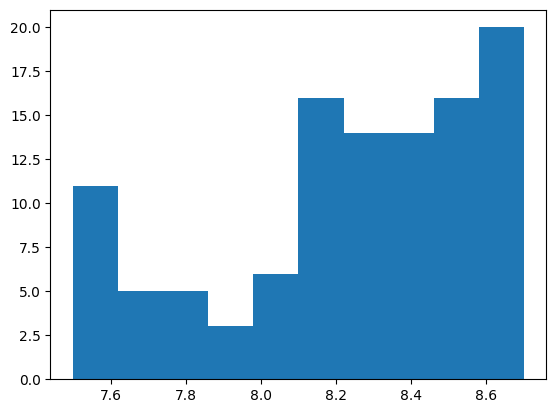

In [ ]:
plt.hist(trainingset['pH'])

In [ ]:
trainingset.to_csv('/content/train_report.csv',index=False)

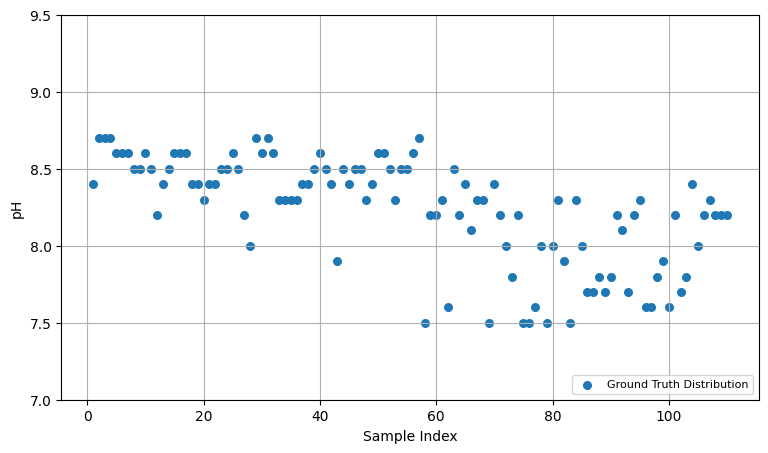

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(np.arange(1, len(pH)+1), pH, label="Ground Truth Distribution",s = 30)
plt.ylim(7.0,9.5)
plt.ylabel("pH")
plt.xlabel("Sample Index")
plt.legend()
plt.legend( fontsize="8", loc ="lower right")
plt.grid()

In [ ]:
validationset = pd.read_csv('/content/tt.csv')
validationset

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B7,B8,B8A,B9,B11,B12,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,K_RIG_P1,2023-05-25,8.4,27.0,30.0,140.0,170.0,6100.0,440.0,1215.0,...,2727,2789,3124,3559,2903,3661,429,0,0,0
1,P1_TEST,2022-11-22,8.7,40.0,50.0,110.0,160.0,7200.0,442.0,1571.0,...,2177,2079,2322,2582,2493,2513,275,0,0,0
2,P2_TEST,NaN,8.2,25.0,20.0,160.0,180.0,6760.0,918.0,1032.0,...,2156,2266,2577,2918,2497,3013,400,0,0,0
3,Ocean,NaN,8.0,34.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1868,2023,2384,2759,2032,2895,416,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2036,2023,2384,2759,2190,2895,416,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2737,2738,3057,3490,2925,3643,464,0,0,0


In [ ]:
dataframe = pd.read_csv("./dataframe-tve.csv")
print("Total samples", len(dataframe))
#dataframe = dataframe[dataframe["Coincidence"]<3]
dataframe = dataframe[dataframe["Salinity"]>20]
print(len(dataframe))
#validationset = dataframe[dataframe["Date of Image"]=="2023-07-09"]
#trainingset = dataframe.drop(validationset.index)

Total samples 179
125


In [ ]:
test = pd.read_csv('/content/avanti_rest1.csv')
test.columns
validationset = test

In [ ]:
prev = pd.read_csv('/content/dataframe-tve.csv')
prev.columns

Index(['PondID', 'pH', 'Salinity', 'Carbonate', 'BiCarbonate', 'Alkalinity',
       'Hardness', 'Calcium', 'Magnesium', 'Ammonia', 'DateofReport',
       'Coincidence', 'Date of Image', 'B1', 'B10', 'B11', 'B12', 'B2', 'B3',
       'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9'],
      dtype='object')

In [ ]:
trainingset = pd.read_csv('/content/WQIModelTrain.csv')
validationset = pd.read_csv('/content/WQIModelTest.csv')

In [ ]:
validationset.columns
validationset = validationset.drop(['Unnamed: 0'],axis = 1)

In [ ]:
trainingset = trainingset.drop(['Unnamed: 0'],axis = 1)

In [ ]:
trainingset = dataframe[dataframe["Salinity"]>20]

In [ ]:
validationset = pd.read_csv('/content/test-sentinel-new.csv')

In [ ]:
validationset = validationset[validationset["Salinity"]>20]
validationset.dtypes

village_name         object
farmer_name          object
pond_name            object
Report Date          object
pH                  float64
Salinity            float64
Carbonate           float64
BiCarbonate         float64
Alkalinity          float64
Hardness            float64
Calcium             float64
Magnesium           float64
Ammonia             float64
pond_polygon_new     object
farm_polygon         object
feed_supplier        object
Coincidence           int64
Available?           object
B1                    int64
B10                   int64
B11                   int64
B12                   int64
B2                    int64
B3                    int64
B4                    int64
B5                    int64
B6                    int64
B7                    int64
B8                    int64
B8A                   int64
B9                    int64
QA10                  int64
QA20                  int64
QA60                  int64
dtype: object

In [ ]:
valid_amm = validationset[validationset['Ammonia'].notna()]
valid_amm

,village_name,farmer_name,pond_name,Report Date,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,...,B4,B5,B6,B7,B8,B8A,B9,QA10,QA20,QA60
5,ANDALAMALA,BALAJI,1,2023-04-25,7.7,30.0,0.0,170.0,170.0,8200.0,...,1231,1241,1193,1300,1121,1269,233,0,0,0
6,ANDALAMALA,BALAJI,2,2023-04-25,7.8,27.0,0.0,200.0,200.0,7400.0,...,1217,1285,1281,1389,1142,1336,239,0,0,0
7,DORUVUKATTA,MADHU REDDY,e1,2023-05-09,7.8,25.0,0.0,200.0,200.0,6500.0,...,2136,2123,2418,2760,2770,2943,694,0,0,0
8,DORUVUKATTA,MADHU REDDY,e3,2023-05-09,7.9,25.0,0.0,220.0,220.0,6600.0,...,2244,2148,2403,2716,2801,2908,658,0,0,0
9,DORUVUKATTA,MADHU REDDY,e1,2023-05-09,7.8,25.0,0.0,200.0,200.0,6500.0,...,2136,2123,2418,2760,2770,2943,694,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,TUPILIPALEM,KHADAR,4,2023-04-23,8.0,26.0,0.0,220.0,220.0,6460.0,...,1254,1323,1259,1374,1126,1340,236,0,0,0
187,TUPILIPALEM,KHADAR,5,2023-04-23,8.0,25.0,0.0,200.0,200.0,6160.0,...,2089,2146,2480,2845,2737,3109,326,0,0,0
188,TUPILIPALEM,AMASAIAH,2,2023/06/27,8.3,30.0,30.0,170.0,200.0,6200.0,...,878,920,872,954,840,881,305,0,0,0
189,TUPILIPALEM,AMASAIAH,4,2023/06/27,8.0,27.0,0.0,190.0,190.0,5600.0,...,904,943,899,1025,915,976,357,0,0,0


In [ ]:
convert_dict = {'Ammonia': float
                }
valid_amm = valid_amm.astype(convert_dict)


ValueError: ignored

In [ ]:
np.where(valid_amm=='Nill')

(array([76, 78, 79, 86]), array([12, 12, 12, 12]))

In [ ]:
len(amm)

90

In [ ]:
release = valid_amm[['village_name','farmer_name','pond_name','pH','Salinity','Ammonia']]
release['predicted_pH'] = ph
release['predicted_Salinity'] = sal
release['predicted_Ammonia']= amm
release.to_csv('/content/test_results.csv',index =False)

<ipython-input-111-afad2d132bbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release['predicted_pH'] = ph
<ipython-input-111-afad2d132bbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release['predicted_Salinity'] = sal
<ipython-input-111-afad2d132bbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
release

,village_name,farmer_name,pond_name,pH,Salinity,Ammonia,predicted_pH,predicted_Salinity,predicted_Ammonia
3,ANDALAMALA,BALAJI,1,7.7,30.0,0.02,7.940677,27.136189,0.033694
4,ANDALAMALA,BALAJI,2,7.8,27.0,0.03,7.847479,27.139099,0.039631
6,GOVINDAPALLI,AZAMTHULLHA,2,8.1,25.0,0.03,8.298063,31.945873,0.040376


In [ ]:
validationset

,village_name,farmer_name,pond_name,Report Date,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,...,B4,B5,B6,B7,B8,B8A,B9,QA10,QA20,QA60
5,ANDALAMALA,BALAJI,1,2023-04-25,7.7,30.0,0.0,170.0,170.0,8200.0,...,1231,1241,1193,1300,1121,1269,233,0,0,0
6,ANDALAMALA,BALAJI,2,2023-04-25,7.8,27.0,0.0,200.0,200.0,7400.0,...,1217,1285,1281,1389,1142,1336,239,0,0,0
7,DORUVUKATTA,MADHU REDDY,e1,2023-05-09,7.8,25.0,0.0,200.0,200.0,6500.0,...,2136,2123,2418,2760,2770,2943,694,0,0,0
8,DORUVUKATTA,MADHU REDDY,e3,2023-05-09,7.9,25.0,0.0,220.0,220.0,6600.0,...,2244,2148,2403,2716,2801,2908,658,0,0,0
9,DORUVUKATTA,MADHU REDDY,e1,2023-05-09,7.8,25.0,0.0,200.0,200.0,6500.0,...,2136,2123,2418,2760,2770,2943,694,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,TUPILIPALEM,KHADAR,4,2023-04-23,8.0,26.0,0.0,220.0,220.0,6460.0,...,1254,1323,1259,1374,1126,1340,236,0,0,0
187,TUPILIPALEM,KHADAR,5,2023-04-23,8.0,25.0,0.0,200.0,200.0,6160.0,...,2089,2146,2480,2845,2737,3109,326,0,0,0
188,TUPILIPALEM,AMASAIAH,2,2023/06/27,8.3,30.0,30.0,170.0,200.0,6200.0,...,878,920,872,954,840,881,305,0,0,0
189,TUPILIPALEM,AMASAIAH,4,2023/06/27,8.0,27.0,0.0,190.0,190.0,5600.0,...,904,943,899,1025,915,976,357,0,0,0


In [ ]:
validationset.columns

Index(['village_name', 'farmer_name', 'pond_name', 'Report Date', 'pH',
       'Salinity', 'Carbonate', 'BiCarbonate', 'Alkalinity', 'Hardness',
       'Calcium', 'Magnesium', 'Ammonia', 'pond_polygon_new', 'farm_polygon',
       'feed_supplier', 'Coincidence', 'Available?', 'B1', 'B10', 'B11', 'B12',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'QA10', 'QA20',
       'QA60'],
      dtype='object')

In [ ]:
len(sal)

90

In [ ]:
ph =train_inf(trainingset,valid_amm,'pH',1)
sal=train_inf(trainingset,valid_amm,'Salinity',10)
amm =train_inf(trainingset,valid_amm,'Ammonia',100)
# mag = train_inf(trainingset,validationset,'Magnesium',1000)
# cal =train_inf(trainingset,validationset,'Calcium',1000)
# carb=train_inf(trainingset,validationset,'Carbonate',100)
# bicarb=train_inf(trainingset,validationset,'BiCarbonate',100)
# hard=train_inf(trainingset,validationset,'Hardness',1000)
# alk=train_inf(trainingset,validationset,'Alkalinity',100)
pH = 0.2271
sal =  4.6838
amm = 0.0175

pH

------------------------------------------------------------------
baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.22710364022197205

 Predicted
None
7.7 7.996369901176086
7.8 7.95269252723708
7.8 8.22231157566747
7.9 8.226911109597678
7.8 8.22231157566747
7.9 8.226911109597678
7.8 7.980993603998859
8.1 7.951455812596753
7.8 7.980993603998859
8.1 7.951455812596753
8.1 7.947272451900795
8.2 8.248053754256572
8.3 8.256529560853235
8.3 8.240213858147628
8.3 8.239191173586208
7.9 8.395888078688358
7.9 8.31197288787818
8.0 8.304502072499739
8.0 8.342955965888919
8.3 8.385980416866788
8.3 8.370600953687529
8.1 8.44350231288848
8.0 8.229855253491316
7.9 8.200117382718743
8.0 8.19824260220283
7.9 8.186177177762472
8.2 8.224997364575437
8.2 8.292643292610178
8.2 8.230980745772442
8.0 8.289205147978338
7.8 8.144171552230485
8.6 8.23244196396513
8.5 8.227220825654417
8.4 8.396164166893842
8.3 8.264294573130796
8.5 8.2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test results
___________________________
MAE 0.01758975684551271

 Predicted
None
0.02 0.028524243936454335
0.03 0.03352645040104357
0.05 0.03834447010955053
0.07 0.03827333021861455
0.05 0.03834447010955053
0.07 0.03827333021861455
0.06 0.03477482456508464
0.06 0.04226658670569476
0.06 0.03477482456508464
0.06 0.04226658670569476
0.0 0.0387357392212951
0.01 0.03470520478704695
0.02 0.034786446809561056
0.01 0.033714187317893
0.01 0.030412493003686644
0.03 0.018332851701925838
0.04 0.01923650115419002
0.03 0.021674312332723565
0.04 0.022244477812815452
0.03 0.017288295925680895
0.03 0.015455264554638774
0.03 0.02424293642137789
0.01 0.030300782085987823
0.04 0.03141965568861528
0.02 0.03221235927902728
0.05 0.03130526366211387
0.04 0.027102715243935344
0.02 0.021944141080559965
0.02 0.030228479383665418
0.03 0.026572401006357695
0.06 0.039387997637861355
0.02 0.03812902932073991
0.03 0.03829888622491593
0.02 0.023898277650377105
0.0 0.04667182092936513
0.02 0.03211609824124682
0.02 0.0

In [ ]:
ph =train_inf(trainingset,validationset,'pH',1)
sal=train_inf(saltrain,validationset,'Salinity',10)
amm =train_inf(trainingset,validationset,'Ammonia',100)
mag = train_inf(trainingset,validationset,'Magnesium',1000)
cal =train_inf(trainingset,validationset,'Calcium',1000)
carb=train_inf(trainingset,validationset,'Carbonate',100)
bicarb=train_inf(trainingset,validationset,'BiCarbonate',100)
hard=train_inf(trainingset,validationset,'Hardness',1000)
alk=train_inf(trainingset,validationset,'Alkalinity',100)

pH

baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.3238451959639067

 Predicted
None
8.0 8.283518646989906
8.5 8.39827259582833
8.1 8.576220052605521
8.2 8.437517215870502
7.9 8.484989561621434
7.7 8.401196203527965
8.5 8.357304765423109
8.2 8.338181272065539
8.4 8.504697922084581
8.0 8.476198416646447
8.1 8.441632542712423
8.3 8.437434493930766
8.3 8.420368313222493
8.6 8.33017079159495
7.7 8.441471451027413

Salinity

baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________
MAE 2.577166180694119

 Predicted
None
35.0 35.96014044218521
40.0 36.86132146684399
40.0 36.54664479343533
40.0 38.15519477278896
36.0 38.28384511366986
35.0 36.72733656974472
40.0 36.10902031697667
40.0 35.33469450542124
42.0 39.00468679162442
40.0 38.615196257709954
40.0 37.4873244550252
40.0 38.29013981614585
39.0 36.87837854271706
40.0 35.934766374995455
39.0 37.096461321503

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Test results
___________________________
MAE 15.306221001627915

 Predicted
None
0.0 19.046283736558028
40.0 20.730216510431795
10.0 27.275574053381597
20.0 24.686427476921114
0.0 24.112416666547727
0.0 21.93313585232799
30.0 19.732740818706223
20.0 22.242893358776744
30.0 25.452690759792485
0.0 23.652794123435118
0.0 23.33885567143624
30.0 23.253589378548405
30.0 21.967319826624575
40.0 19.08790704294194
0.0 23.529398422079584

BiCarbonate

baseline val :  90
baseline_index :  6
___________________________________
Test results
___________________________
MAE 34.73713624694638

 Predicted
None
140.0 120.48039223603034
160.0 115.44779048852024
170.0 129.97502275308622
150.0 112.92150929952489
170.0 117.30163051533255
160.0 117.13330856515852
150.0 121.37176756254348
180.0 128.25091847526727
150.0 106.0894897113867
170.0 111.40193030693817
150.0 115.99454388159192
140.0 108.0451566103671
120.0 118.0289946935973
90.0 121.22404144191269
120.0 117.72454263837243

Hardness

baseline val :  4

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ph =train_inf(trainingset,validationset,'pH',1)
sal=train_inf(trainingset,validationset,'Salinity',10)
amm =train_inf(trainingset,validationset,'Ammonia',100)
mag = train_inf(trainingset,validationset,'Magnesium',1000)
cal =train_inf(trainingset,validationset,'Calcium',1000)
carb=train_inf(trainingset,validationset,'Carbonate',100)
bicarb=train_inf(trainingset,validationset,'BiCarbonate',100)
hard=train_inf(trainingset,validationset,'Hardness',1000)
alk=train_inf(trainingset,validationset,'Alkalinity',100)

pH

baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.22926493160527395

 Predicted
None
8.4 8.193034644994924
8.7 8.462658322322282
8.2 7.907233731424766
8.0 8.179986425163069

Salinity

baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________
MAE 3.2101630825417597

 Predicted
None
27.0 29.98358609506859
40.0 33.92877774132077
25.0 24.99478007114393
34.0 30.21937595243685

Ammonia

baseline val :  0.0
baseline_index :  0
___________________________________
Test results
___________________________
MAE 0.256012722422931

 Predicted
None
0.0 0.03866627816625498
0.01 0.01864890696398011
0.06 0.061441984601548094
1.0 0.024706280040059134

Magnesium

baseline val :  603
baseline_index :  115
___________________________________
Test results
___________________________
MAE 387.16190958633393

 Predicted
None
1215.0 1278.4837629624228
1571.0 1433.7092051647746


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

110.0 147.96194196787638
160.0 149.58307029150723
1.0 170.12638506040744

Hardness

baseline val :  4500
baseline_index :  6
___________________________________
Test results
___________________________
MAE 1800.19676853819

 Predicted
None
6100.0 6538.056582805582
7200.0 6442.383784919815
6760.0 6891.317711830496
1.0 5874.796564436498

Alkalinity

baseline val :  120
baseline_index :  115
___________________________________
Test results
___________________________
MAE 58.13099034044226

 Predicted
None
170.0 169.22670977316207
160.0 178.08031371800035
180.0 153.54218447339846
1.0 188.21254189032922



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ph =train_inf(trainingset,validationset,'pH',1)
sal=train_inf(trainingset,validationset,'Salinity',10)
amm =train_inf(trainingset,validationset,'Ammonia',100)
mag = train_inf(trainingset,validationset,'Magnesium',1000)
cal =train_inf(trainingset,validationset,'Calcium',1000)
carb=train_inf(trainingset,validationset,'Carbonate',100)
bicarb=train_inf(trainingset,validationset,'BiCarbonate',100)
hard=train_inf(trainingset,validationset,'Hardness',1000)
alk=train_inf(trainingset,validationset,'Alkalinity',100)

pH

baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.19868542028240577

 Predicted
None
8.4 8.222875312028107
8.7 8.460432532556236
8.2 7.910295014017632
8.0 8.0883445397316

Salinity

baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________
MAE 3.1493531959026795

 Predicted
None
27.0 29.481475411492664
40.0 33.93865749775754
25.0 24.986163452632752
34.0 29.959241677491654

Ammonia

baseline val :  0.0
baseline_index :  0
___________________________________
Test results
___________________________
MAE 0.25370607872859274

 Predicted
None
0.0 0.032489317509076535
0.01 0.016459947872140838
0.06 0.061422380041368144
1.0 0.025547330508214526

Magnesium

baseline val :  821
baseline_index :  83
___________________________________
Test results
___________________________
MAE 383.3116536925813

 Predicted
None
1215.0 1232.673034833771
1571.0 1429.917993810456

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Test results
___________________________
MAE 194.49702823258235

 Predicted
None
440.0 545.3446050860362
442.0 392.46038982028256
918.0 763.8908544467358
1.0 469.9947521113117

Carbonate

baseline val :  0
baseline_index :  27
___________________________________
Test results
___________________________
MAE 11.573189470293274

 Predicted
None
30.0 20.282798269604672
50.0 30.168951622931427
20.0 17.579427017538762
1.0 15.323934791247956

BiCarbonate

baseline val :  90
baseline_index :  6
___________________________________
Test results
___________________________
MAE 56.58119130797998

 Predicted
None
140.0 136.04918759910328
110.0 145.40758134313592
160.0 149.5171631699235
1.0 177.48353465781076

Hardness

baseline val :  4500
baseline_index :  6
___________________________________
Test results
___________________________
MAE 1787.4002365126414

 Predicted
None
6100.0 6265.317868398097
7200.0 6395.099439460421
6760.0 6887.581083261464
1.0 6052.801433851426

Alkalinity

baseline val :  

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ph =train_inf(trainingset,validationset,'pH',1)
sal=train_inf(trainingset,validationset,'Salinity',10)
amm =train_inf(trainingset,validationset,'Ammonia',100)
mag = train_inf(trainingset,validationset,'Magnesium',1000)
cal =train_inf(trainingset,validationset,'Calcium',1000)
carb=train_inf(trainingset,validationset,'Carbonate',100)
bicarb=train_inf(trainingset,validationset,'BiCarbonate',100)
hard=train_inf(trainingset,validationset,'Hardness',1000)
alk=train_inf(trainingset,validationset,'Alkalinity',100)

pH

baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.3238451959639067

 Predicted
None
8.0 8.283518646989906
8.5 8.39827259582833
8.1 8.576220052605521
8.2 8.437517215870502
7.9 8.484989561621434
7.7 8.401196203527965
8.5 8.357304765423109
8.2 8.338181272065539
8.4 8.504697922084581
8.0 8.476198416646447
8.1 8.441632542712423
8.3 8.437434493930766
8.3 8.420368313222493
8.6 8.33017079159495
7.7 8.441471451027413

Salinity

baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________
MAE 2.532890429705091

 Predicted
None
35.0 35.766733763215015
40.0 36.78327574116457
40.0 36.790536886494635
40.0 38.37429978113569
36.0 38.52655930503117
35.0 36.70495239515186
40.0 35.99528849390024
40.0 35.286467651452284
42.0 39.29663954283452
40.0 38.75871428895375
40.0 37.57778259804472
40.0 38.336066926496706
39.0 36.915815282326484
40.0 35.78182072580131
39.0 37.10818109

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Test results
___________________________
MAE 15.306221001627915

 Predicted
None
0.0 19.046283736558028
40.0 20.730216510431795
10.0 27.275574053381597
20.0 24.686427476921114
0.0 24.112416666547727
0.0 21.93313585232799
30.0 19.732740818706223
20.0 22.242893358776744
30.0 25.452690759792485
0.0 23.652794123435118
0.0 23.33885567143624
30.0 23.253589378548405
30.0 21.967319826624575
40.0 19.08790704294194
0.0 23.529398422079584

BiCarbonate

baseline val :  90
baseline_index :  6
___________________________________
Test results
___________________________
MAE 34.73713624694638

 Predicted
None
140.0 120.48039223603034
160.0 115.44779048852024
170.0 129.97502275308622
150.0 112.92150929952489
170.0 117.30163051533255
160.0 117.13330856515852
150.0 121.37176756254348
180.0 128.25091847526727
150.0 106.0894897113867
170.0 111.40193030693817
150.0 115.99454388159192
140.0 108.0451566103671
120.0 118.0289946935973
90.0 121.22404144191269
120.0 117.72454263837243

Hardness

baseline val :  4

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ph =train_inf_absolute(trainingset,validationset,'pH',1)
sal=train_inf_absolute(trainingset,validationset,'Salinity',10)
amm =train_inf_absolute(trainingset,validationset,'Ammonia',100)
mag = train_inf_absolute(trainingset,validationset,'Magnesium',1000)
cal =train_inf_absolute(trainingset,validationset,'Calcium',1000)
carb=train_inf_absolute(trainingset,validationset,'Carbonate',100)
bicarb=train_inf_absolute(trainingset,validationset,'BiCarbonate',100)
hard=train_inf_absolute(trainingset,validationset,'Hardness',1000)
alk=train_inf_absolute(trainingset,validationset,'Alkalinity',100)

## Only zero coincidence

In [ ]:
dataframe = pd.read_csv("./dataframe-tve.csv")
# dataframe = dataframe[dataframe["Coincidence"]=0]
dataframe = dataframe[dataframe["Salinity"]>20]
print("Total samples", len(dataframe))

Total samples 125


In [ ]:
for l in dataframe["Date of Image"].unique():
    print("Samples for date ",l,": ",len(dataframe[dataframe["Date of Image"]==l]))

Samples for date  2022-07-14 :  8
Samples for date  2022-08-23 :  15
Samples for date  2022-08-28 :  16
Samples for date  2022-09-12 :  16
Samples for date  2023-02-14 :  2
Samples for date  2023-04-20 :  17
Samples for date  2023-04-25 :  4
Samples for date  2023-05-20 :  12
Samples for date  2023-05-30 :  13
Samples for date  2023-07-09 :  15
Samples for date  2023-04-15 :  7


In [ ]:
### selecting 09-07-2023 for testing

validationset = dataframe[dataframe["Date of Image"]=="2023-07-09"]
trainingset = dataframe.drop(validationset.index)

In [ ]:
trainingset

,PondID,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,Ammonia,...,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9
0,TUPILIPALEM_A2,8.4,35,30,120,150,6300,388,1296,0.00,...,612,1253,1154,919,1025,1059,1171,920,1188,165
1,TUPILIPALEM_A3,8.7,38,40,120,160,6800,472,1471,0.00,...,484,1179,1065,794,854,918,1042,737,993,131
2,TUPILIPALEM_A4,8.7,39,40,110,150,6960,482,1488,0.00,...,432,1114,969,708,779,727,825,641,897,170
3,TUPILIPALEM_A5,8.7,40,40,120,160,7100,488,1491,0.00,...,524,1127,950,798,734,844,963,614,952,157
4,TUPILIPALEM_B2,8.6,36,50,110,160,6200,378,1302,0.00,...,710,1236,1162,1108,1114,1217,1268,828,1254,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,ERURU_C4,8.2,23,20,190,210,4800,344,1102,0.02,...,738,1430,1377,1175,1175,1048,1169,891,1093,344
174,ERURU_D1,8.3,27,30,190,220,5700,412,1186,0.01,...,537,1390,1328,1002,1163,1051,1093,908,930,333
175,ERURU_D2,8.2,25,20,180,200,5200,400,1166,0.04,...,457,1417,1406,1121,1321,1094,1151,934,1027,258
176,ERURU_D3,8.2,23,20,190,210,4700,340,1132,0.03,...,518,1440,1443,1207,1334,1161,1280,874,1173,294


In [ ]:
validationset = pd.read_csv("./kotatestnew.csv")

In [ ]:
validationset

,Pond,Date of Capture,pH,Salinity,Carbonate,BiCarbonate,Alkalinity,Hardness,Calcium,Magnesium,...,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,K_RIG_P1,2023-05-25,8.4,27,30,140,170,6100,440,1215,...,1636,1598,2022,2188,2413,1733,2568,210,2778,2189


In [ ]:
ph =train_inf(trainingset,validationset,'pH',1)
sal=train_inf(trainingset,validationset,'Salinity',10)
amm =train_inf(trainingset,validationset,'Ammonia',100)
mag = train_inf(trainingset,validationset,'Magnesium',1000)
cal =train_inf(trainingset,validationset,'Calcium',1000)
carb=train_inf(trainingset,validationset,'Carbonate',100)
bicarb=train_inf(trainingset,validationset,'BiCarbonate',100)
hard=train_inf(trainingset,validationset,'Hardness',1000)
alk=train_inf(trainingset,validationset,'Alkalinity',100)

pH

baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.17712468797189374

 Predicted
None
8.4 8.222875312028107

Salinity

baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________
MAE 2.4814754114926636

 Predicted
None
27.0 29.481475411492664

Ammonia

baseline val :  0.0
baseline_index :  0
___________________________________
Test results
___________________________
MAE 0.032489317509076535

 Predicted
None
0.0 0.032489317509076535

Magnesium

baseline val :  821
baseline_index :  83
___________________________________
Test results
___________________________
MAE 17.673034833771

 Predicted
None
1215.0 1232.673034833771

Calcium

baseline val :  300
baseline_index :  70
___________________________________
Test results
___________________________
MAE 105.34460508603615

 Predicted
None
440.0 545.3446050860362

Carbonate

baseline val :  0
baseline_index 

/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

In [ ]:
ph =train_inf_absolute(trainingset,validationset,'pH',1)
sal=train_inf_absolute(trainingset,validationset,'Salinity',10)
amm =train_inf_absolute(trainingset,validationset,'Ammonia',100)
mag = train_inf_absolute(trainingset,validationset,'Magnesium',1000)
cal =train_inf_absolute(trainingset,validationset,'Calcium',1000)
carb=train_inf_absolute(trainingset,validationset,'Carbonate',100)
bicarb=train_inf_absolute(trainingset,validationset,'BiCarbonate',100)
hard=train_inf_absolute(trainingset,validationset,'Hardness',1000)
alk=train_inf_absolute(trainingset,validationset,'Alkalinity',100)

pH

baseline val :  7.5
baseline_index :  57
___________________________________
Test results
___________________________
MAE 0.3382712820730943

Ground Truth - Predicted
None
8.0 8.290039560134517
8.5 8.36084455473149
8.1 8.578756283153352
8.2 8.479032883725669
7.9 8.524846743383353
7.7 8.384132862570096
8.5 8.328188361190929
8.2 8.34979466619341
8.4 8.5679442528832
8.0 8.492120269351979
8.1 8.436719841689879
8.3 8.426445777048862
8.3 8.40351078143732
8.6 8.291118022061786
7.7 8.420876247508982

Salinity

baseline val :  21
baseline_index :  55
___________________________________
Test results
___________________________
MAE 3.076390811224032

Ground Truth - Predicted
None
35 35.33827493135902
40 35.890643045933665
40 37.254908160879296
40 36.827709736899564
36 37.48087198909967
35 35.783269868355745
40 35.55373466167738
40 34.5585125277791
42 38.736625148489196
40 37.36207707793763
40 36.26320581441292
40 36.62298747970338
39 35.7956995505192
40 35.374252550385556
39 36.21619886583706

/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/azhanmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 